# Data Exploration in Jupyter

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv');

*unix command to see file*

In [3]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


*Using Pandas to read csv file in data frame*

In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv')
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


*index_col - Changing index column from id to Date column*

*parse_dates - Converting strings to date*

In [5]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


*matplotlib inline - command to plot images in the notebook itself not separate windows*

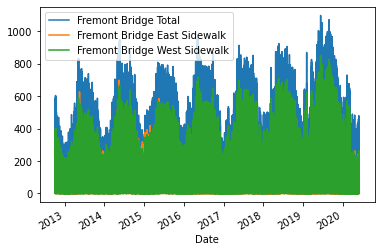

In [6]:
%matplotlib inline
data.plot();

*Data is dense with to many data points. For a better view we will resample weekly and get the sum to see the total number of rides eache week*

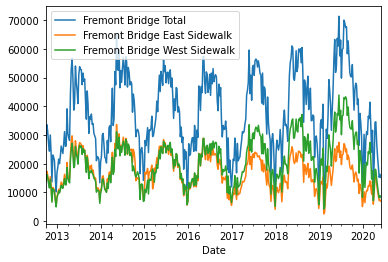

In [7]:
data.resample('W').sum().plot();

*Now we change the style of the plot and rename data columns to shorthen legends*

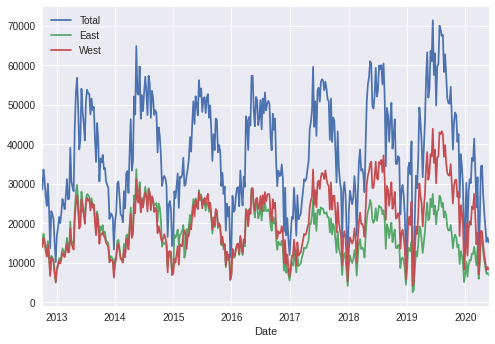

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['Total', 'East','West']
data.resample('W').sum().plot();

*Now we will try to identify any annual trend on the data by resampling the data daily and getting a aggregated sum over 365 days or 1 year. The result shows each data point with the sum of rides on the last 365 days*

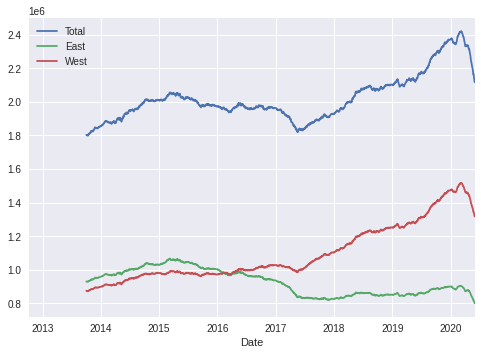

In [9]:
data.resample('D').sum().rolling(365).sum().plot();

*The axes limits are suspect because they are not going all the way to zero, so we forcing ylim from zero to the actual max value*

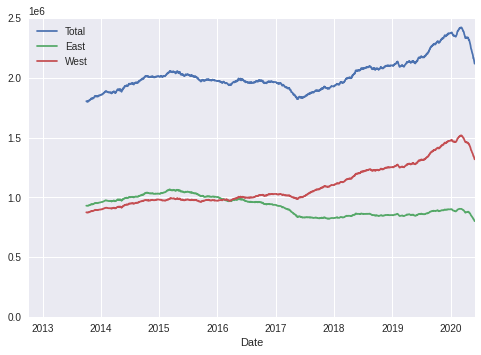

In [10]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

*Adding a new column to the data*

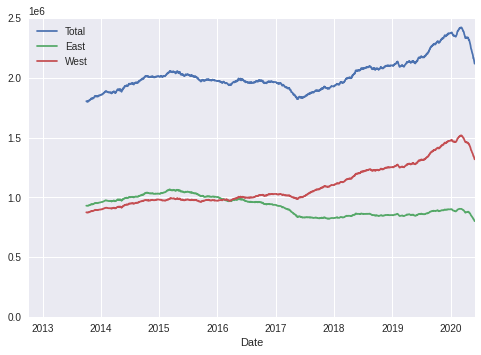

In [11]:
data['Total'] = data['West']+data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

*Now we are going to take a look at a trend in individual days by using groupby on the time of the day and taking the mean*

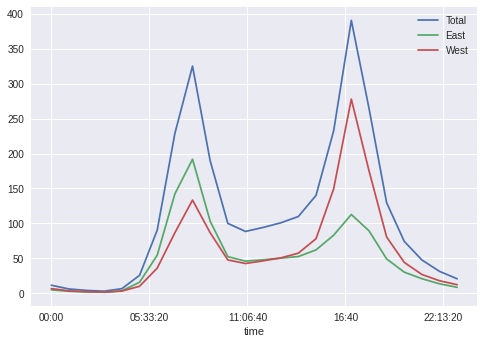

In [12]:
data.groupby(data.index.time).mean().plot();

*Now we want to see the entire dataset in this way by using pivoted tables. We use the total counts indexig on time and showing column date. After that we look at first 5 rows and columns of the result data frame*

In [13]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


*Now we plot that data where each row is the time of the day and each column is a date without legend*

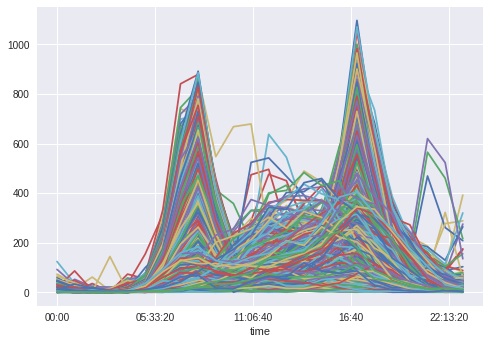

In [14]:
pivoted.plot(legend=False);

*It shows a line for each day of the year. We wiil change transparency to put equal lines on top of each other.*

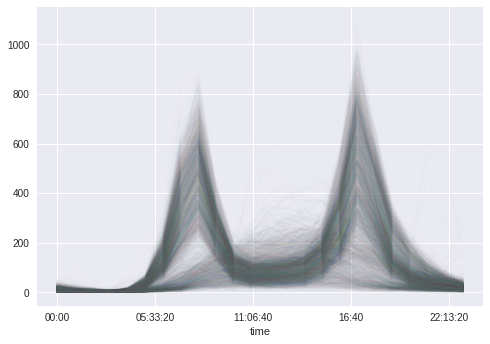

In [15]:
pivoted.plot(legend=False, alpha=0.01);

*you see commute pattern but also different days. The best hipotesis is that it represents weekdays x weekends*